# Fraud detection using Self Organizing Maps

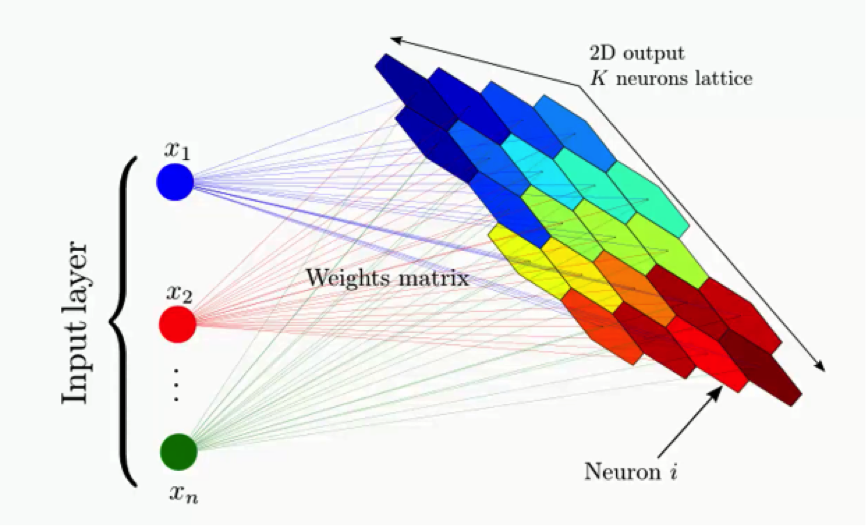

They are a culstering algorithm, they are meant for dimensionality reduction, and working mechanism is unlike any artificial neural network. The assumption is that the data which exists in high-dimensions actually can exist on a low-dimensional subspace as well. Using SOMs we are looking to model the data in this subspace. In order to do this we initialize a 2D structure and slowly make the weights such that they map the actual datapoints. This process relies on a two methods of competitive and cooperative learning.

Using our competitive and cooperative learning steps, we slowly iterate through our dataset, find the node on our lattice closest to it and move both it and its neighbours along the lattice closer to that datapoints. This learning rate, the mechanism for deciding which neighbours get moved and by how much and the shape of our lattice are the critical hyperparameters which are critical to the success and insights of SOM.

Given a credit card application dataset:
    - Given the application data for customers
    - Last column is whether the application is approved or not
    - Find out if any of the customers have likely to commit a fraud or not

In [27]:
##Install MiniSom Package
!pip install MiniSom

In [28]:
# Self Organizing Maps

# Importing Required Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [29]:
# Importing dataset
dataset = pd.read_csv('/kaggle/input/Credit_Card_Applications.csv')
dataset.head(10)

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
5,15571121,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
6,15726466,1,17.42,6.500,2,3,4,0.125,0,0,0,0,2,60,101,0
7,15660390,0,58.67,4.460,2,11,8,3.040,1,1,6,0,2,43,561,1
8,15663942,1,27.83,1.000,1,2,8,3.000,0,0,0,0,2,176,538,0
9,15638610,0,55.75,7.080,2,4,8,6.750,1,1,3,1,2,100,51,0


In [30]:
dataset.dtypes

CustomerID      int64
A1              int64
A2            float64
A3            float64
A4              int64
A5              int64
A6              int64
A7            float64
A8              int64
A9              int64
A10             int64
A11             int64
A12             int64
A13             int64
A14             int64
Class           int64
dtype: object

In [31]:
# X is all columns except last one class
# Y is Class - we use it to verify after clustering (SOM) is done 
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [32]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)

In [33]:
# Training the SOM
#using MiniSom library
from minisom import MiniSom

In [34]:
som = MiniSom(x=10,y=10,input_len=15)

In [35]:
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

In [36]:
som.distance_map().shape

(10, 10)

In [37]:
# visualizing the results 
from pylab import bone, colorbar, pcolor, plot, show

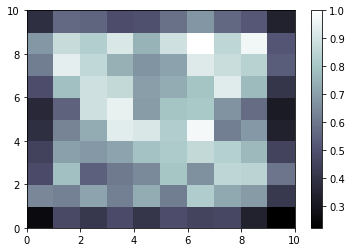

In [38]:
bone()
pcolor(som.distance_map().T)
colorbar()

The above shows the map , but we also need to find whether the customers in the winning neurons have been successful with their applications

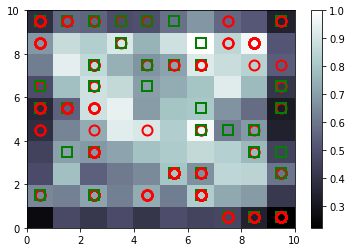

In [39]:
# use markers o for class 0 in y 
# use square (s) for class 1 in y
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's'] #red circles -> customers who didn't get approval
colors = ['r', 'g'] # green square -> customers who got  approval
for i, x in enumerate(X):  # loop over customer database , for each customer vector
    w = som.winner(x)  # getting the winning node for the particular customer
    plot(w[0] + 0.5, # x coordinate of winning node = w[0]
         w[1] + 0.5, # y coordinate of the winning node = w[1], adding 0.5 to put marker in middle of square
         markers[y[i]],# association between customer approval and markers
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

We find winning outlier neurons which have green squares to identify potential frauds

In [40]:
# Finding the frauds
mappings = som.win_map(X) # dictionary of mappings from winning node coordinates to customers
mappings.keys() #keys are the coordinates in the plot

dict_keys([(5, 2), (1, 5), (6, 1), (9, 9), (0, 1), (5, 7), (2, 3), (4, 7), (4, 1), (8, 4), (9, 6), (6, 2), (4, 9), (2, 7), (9, 2), (9, 0), (9, 5), (1, 9), (0, 8), (2, 1), (2, 9), (3, 9), (3, 8), (0, 9), (4, 6), (0, 5), (8, 0), (8, 8), (0, 6), (6, 4), (6, 7), (2, 5), (6, 5), (5, 9), (2, 6), (7, 4), (7, 0), (8, 3), (7, 9), (7, 8), (0, 4), (9, 7), (2, 4), (9, 3), (8, 7), (1, 3), (6, 8), (4, 4)])

In [43]:
# from fig squares (7,5) seem like potential fraudulent customers - white color - maximum mean interneuron distance
frauds = np.concatenate((mappings[(6,4)],mappings[(6,8)]),axis=0)
#frauds = mappings[(7,5)]
np.asarray(frauds).shape

(28, 15)

The above values are scaled down values . Hence we use inverse transform to get actual customer records

In [44]:
frauds = sc.inverse_transform(frauds)  #inverse feature scaled to the original values
np.asarray(frauds).shape

(28, 15)

The above list shows customers who the bank needs to investigate 

## Printing the Fraudulent Clients


In [45]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
    print(int(i))

Fraud Customer IDs
15777994
15585855
15597536
15661412
15697310
15799785
15571284
15591360
15810723
15570947
15641715
15589881
15592326
15671293
15602456
15703177
15697844
15733602
15706602
15728082
15675176
15580579
15568819
15693382
15752601
15665374
15598586
15572361
